In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("1983.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1983,17996,185,28,3517
1,1983,18000,231,29,3546
2,1983,17754,299,20,3554
3,1983,17250,258,15,3522
4,1983,18041,139,13,3542
...,...,...,...,...,...
1955,1983,17599,223,37,3557
1956,1983,17117,421,26,3520
1957,1983,17320,293,38,3555
1958,1983,17561,257,26,3547


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1960, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1960 non-null   int64
 1   Maximum length (m))  1960 non-null   int64
 2   Recession(m),        1960 non-null   int64
 3   Rate/yr(m)           1960 non-null   int64
 4   Snout altitude (m)   1960 non-null   int64
dtypes: int64(5)
memory usage: 76.7 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1960


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1983,17996,185,28,3517
1,1983,18000,231,29,3546
2,1983,17754,299,20,3554
3,1983,17250,258,15,3522
4,1983,18041,139,13,3542


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0123,0.0005,-0.0333
"Recession(m),",NaN,0.0123,1.0000,-0.0121,0.0313
Rate/yr(m),NaN,0.0005,-0.0121,1.0000,-0.0043
Snout altitude (m),NaN,-0.0333,0.0313,-0.0043,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0123
Rate/yr(m)             0.0005
Snout altitude (m)    -0.0333
Year                      NaN
Name: Maximum length (m)), dtype: float64

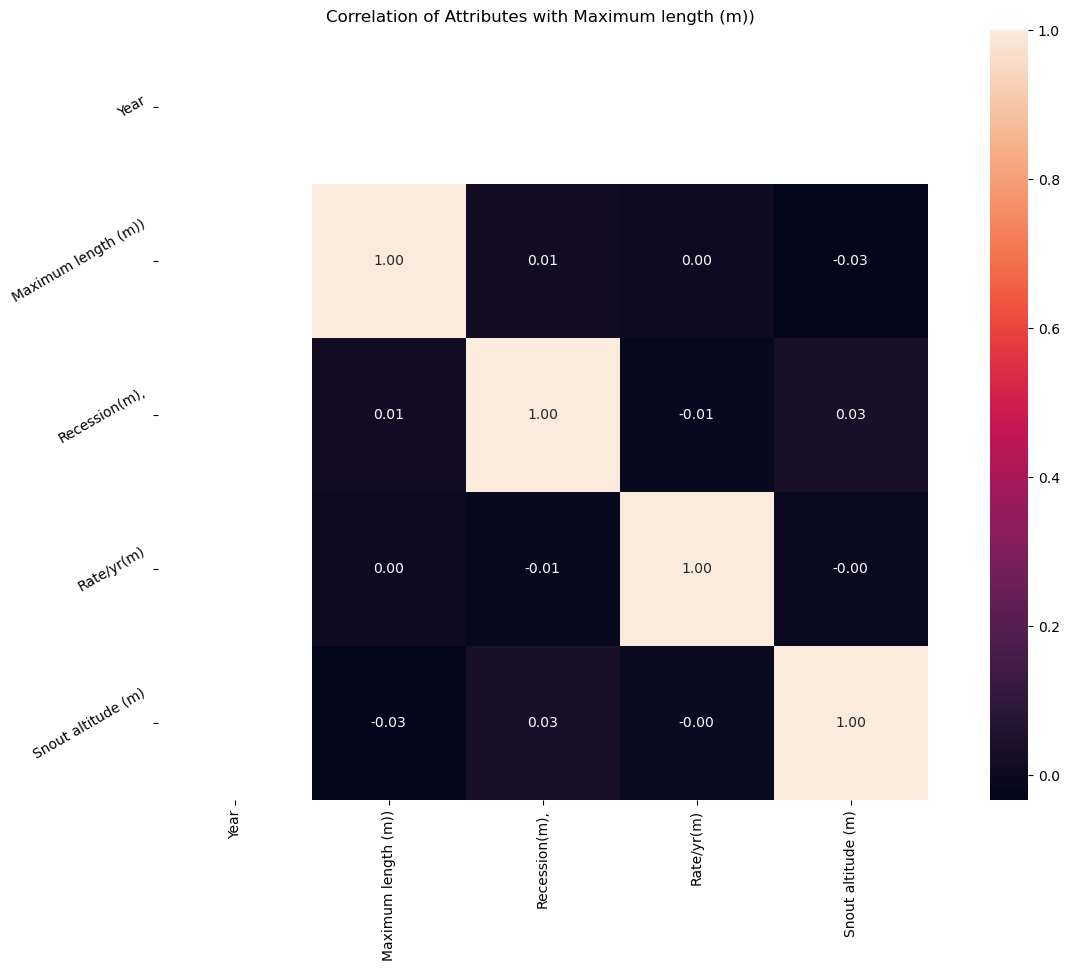

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

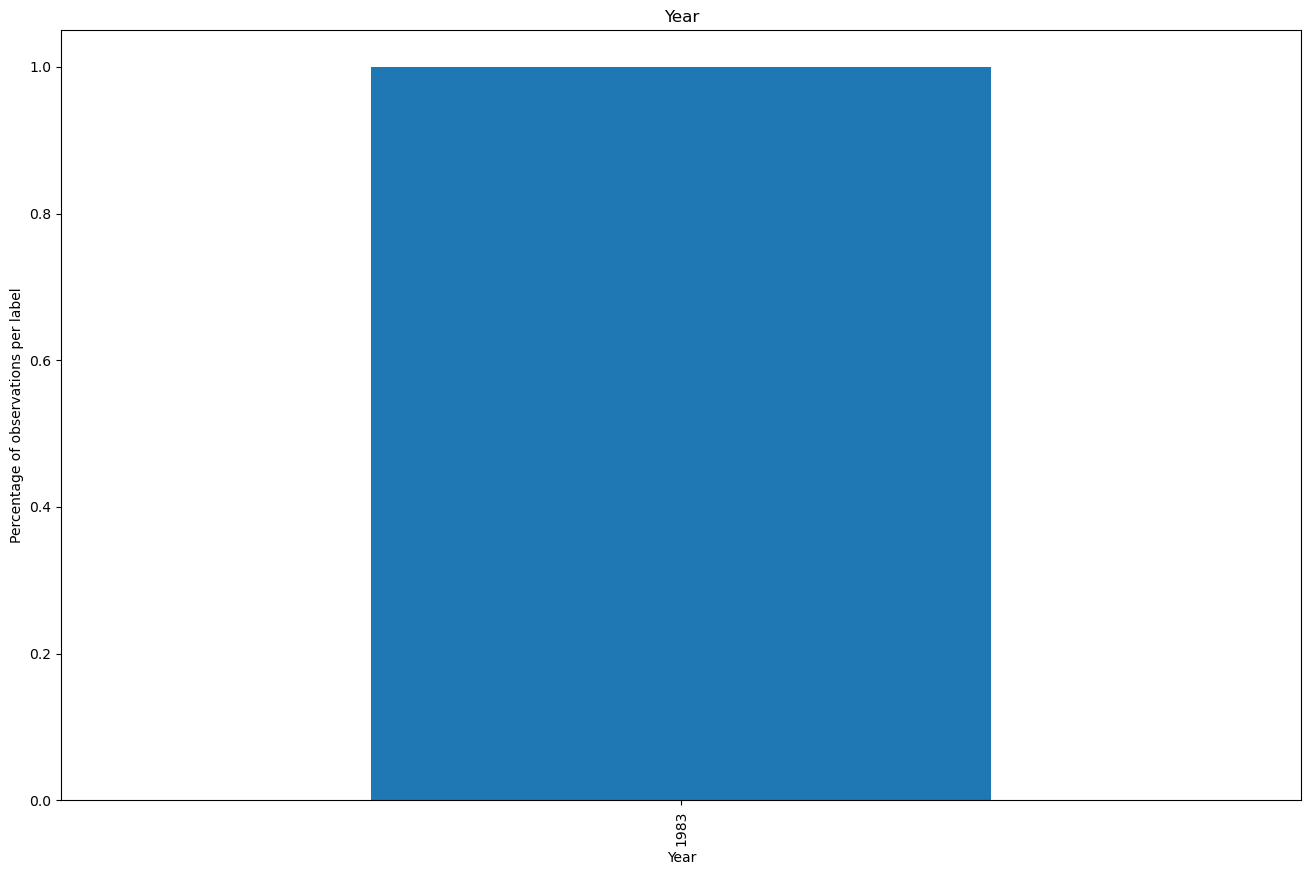

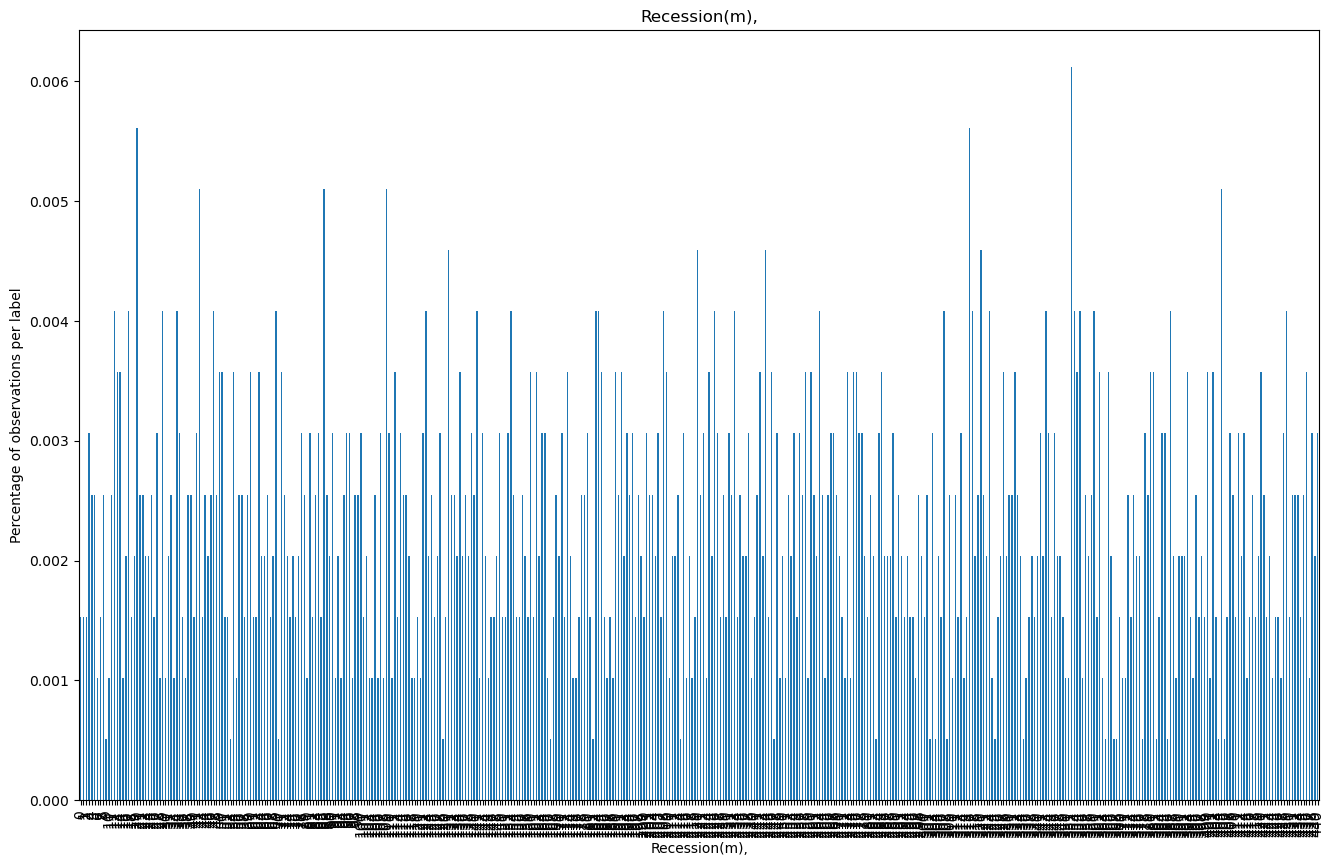

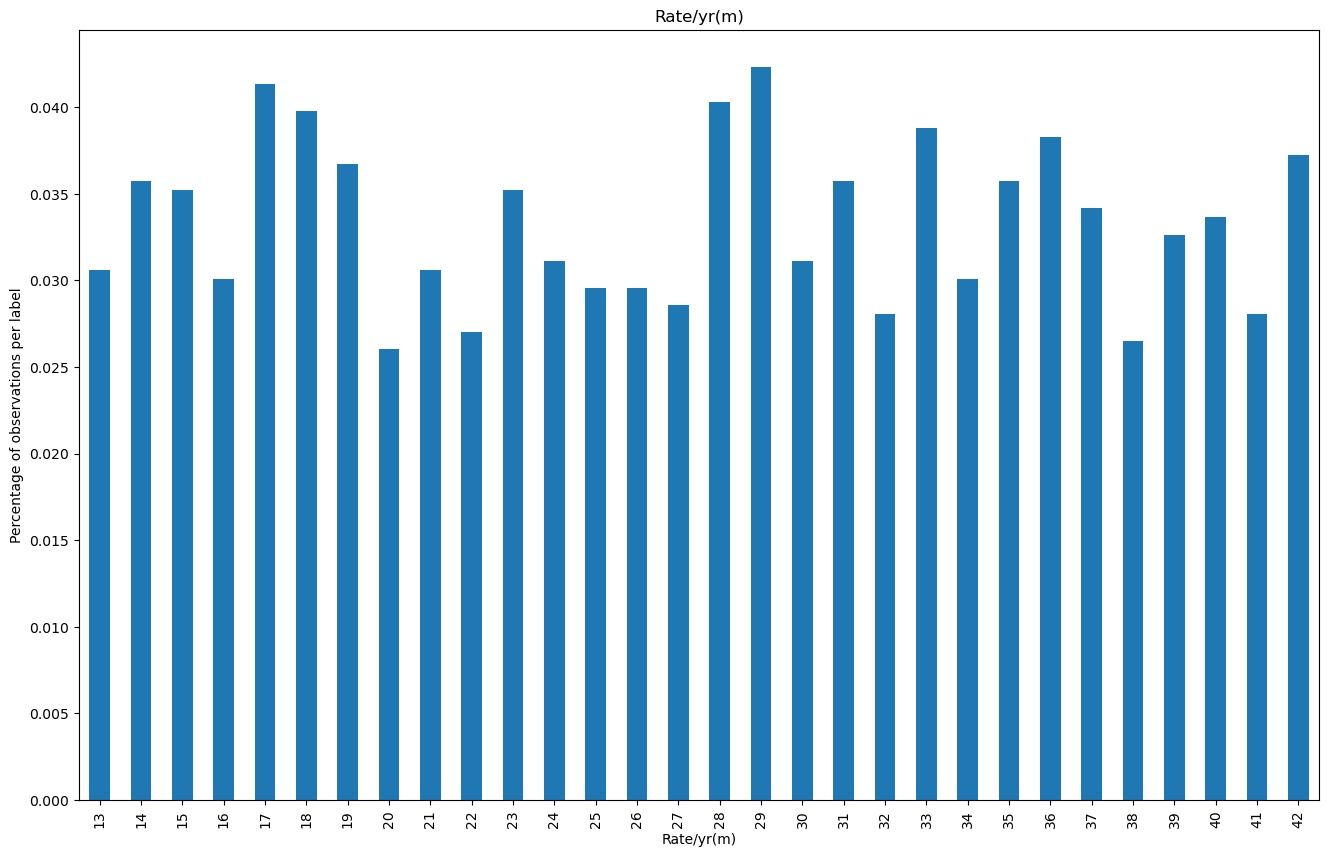

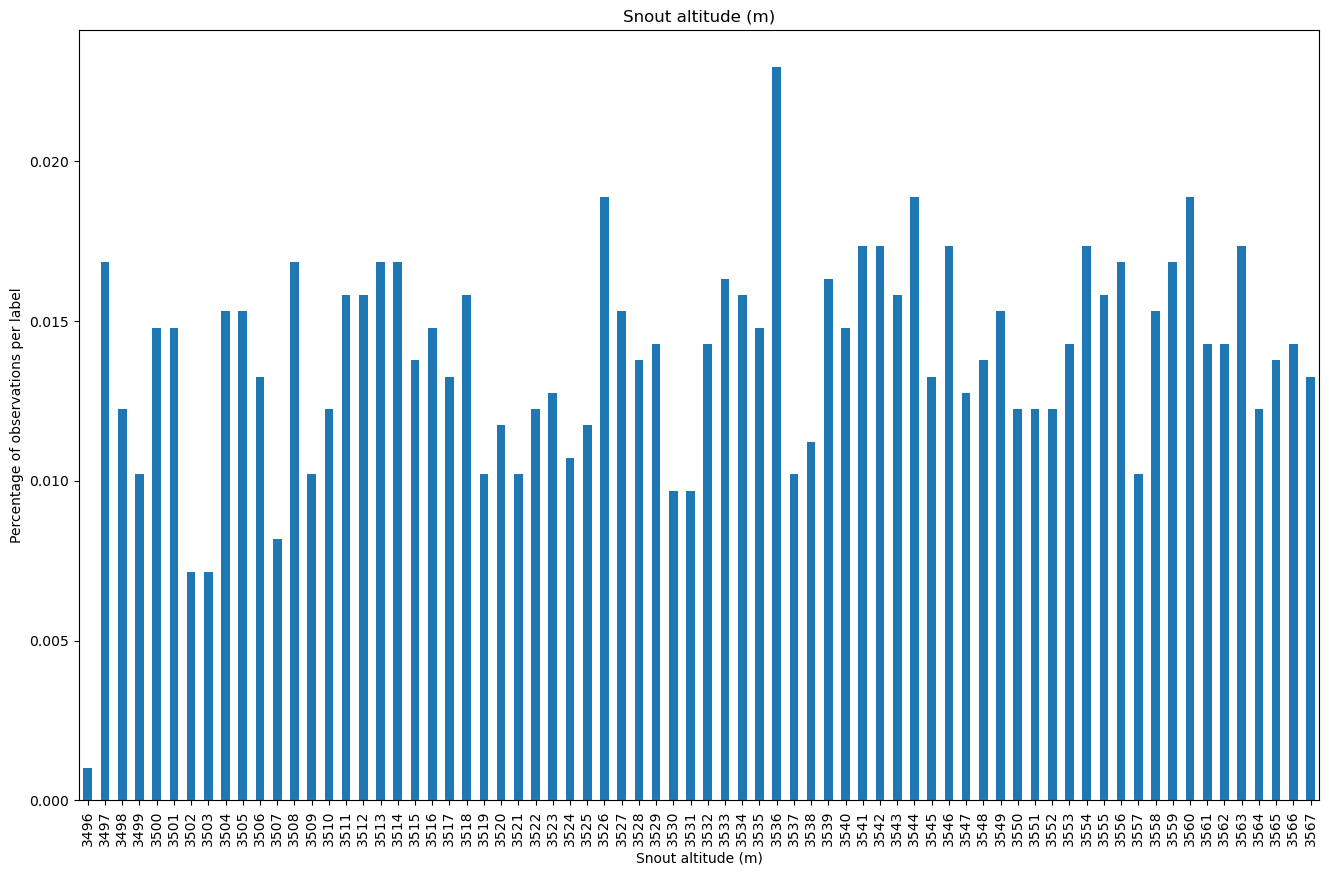

In [14]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()